# Datos, SIG y Sistemas de Referencia
Como vimos en el módulo anterior, los SIG se componen de varios elementos, uno de ellos son los datos.  En nuestros SIG, describimos características y posicionamos fenómenos que ocurren en la Tierra a partir de datos. Los datos utilizados se encuentran integrados por información temática y espacial, ambos componentes requieren de sistemas de referencia para que el usuario pueda interpretar la información. Un sistema de referencia no es más que un conjunto de parámetros que definen un sistema de coordenadas, esto permitirá comparar datos de la misma naturaleza. Por ejemplo, una estación meteorológica, medirá la temperatura ambiente en un lugar determinado. Si el dato recolectado es 20 y no se especifica la unidad de medida, el usuario no podrá conocer si son 20°C, 20°F o 20°K; de manera análoga, los datos posicionales son útiles en la medida que conozcamos en qué sistema de coordenadas fueron almacenados.
	En este módulo nos encargaremos de definir y describir sistemas de referencias para la componente espacial de nuestros datos.

# Sistemas de coordenadas geográficas
Sobre la superficie de referencia elegida es muy sencillo trazar una serie de anillos paralelos al Ecuador y perpendiculares a este (cruzando por los polos) para definir los conocidos paralelos y meridianos. Sobre esta grilla es posible, definiendo un paralelo y meridiano base (el Ecuador y el meridiano de Greenwich), localizar un punto sobre la superficie terrestre. Surgen aquí las coordenadas geográficas en grados sexagesimales (30°16’32” S) o su equivalente en grados decimales (30,275°S).

![](images/coord_geo.png)

Otra posibilidad de ubicar un punto sería a partir de un eje de coordenadas creado con los ejes mayores y menores de un elipsoide y obtener las medias de los ejes X, Y y Z en metros.

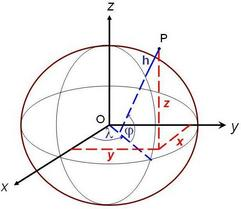




# Proyecciones cartográficas
Un sistema de coordenadas cartesiano o en 2 dimensiones se encuentra definido por dos rectas ortogonales que se intersecan en un punto llamado punto de origen. Nuestras representaciones cartográficas son elementos en 2 dimensiones.

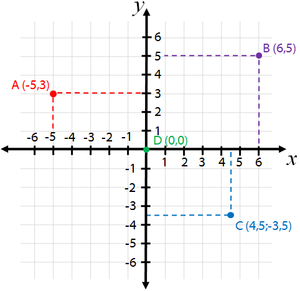

Por lo tanto, para realizar una cartografía es necesario transformar la realidad en un modelo en 2 dimensiones. El proceso de conversión de superficies curvas de la Tierra a superficies planas de los mapas se llama proyección o transformación cartográfica. La diferencia entre una proyección y una transformación es que la conversión, en el caso de las primeras, se realiza (o podría realizarse) de manera geométrica, mientras que las segundas, es una función matemática que convierte las coordenadas geográficas en coordenadas planas. Llamaremos representación cartográfica para englobar ambos casos.

Indefectiblemente estas representaciones van a producir deformaciones debido al traspaso de 3D a 2D. Este cambio de magnitud entre la realidad y nuestra representación puede evidenciarse en las distancias, superficies o formas (ángulos) de los elementos. La transformación elegida para nuestras cartografías dependerá del elemento a conservar (distancias, áreas o formas) ya que es imposible conservar todos ellos, pero si alguna de estas.

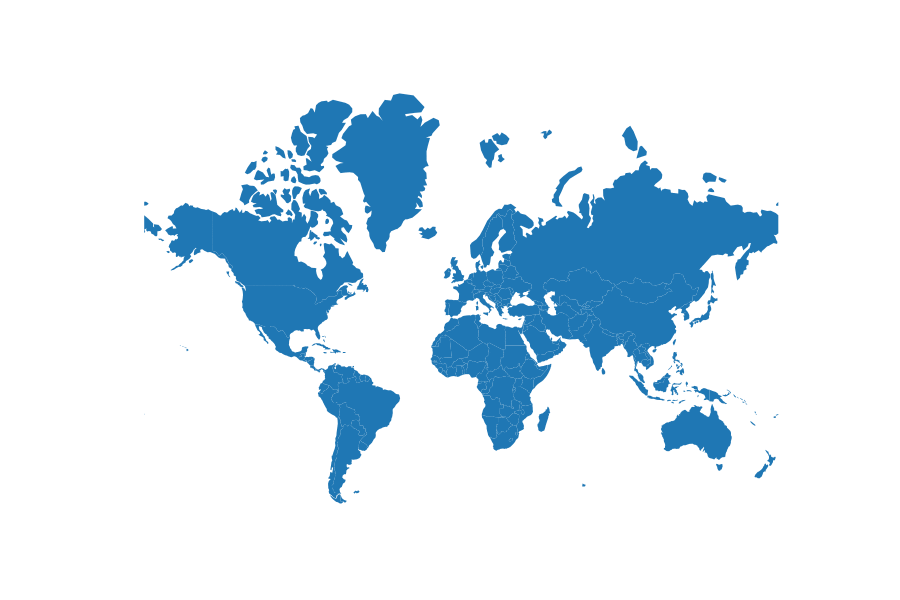

De acuerdo al tipo de deformación que produce, las representaciones cartográficas pueden clasificarse en:
* Equidistantes: conserva las distancias.
* Equivalentes: conserva las superficies.
* Conformes: conserva las formas.
* Convencionales: creadas para representar grandes extensiones consiguiendo un balance entre las distancias, superficies y formas.

Por otro lado, dependiendo del cuerpo sobre el que se proyecte nuestra esfera o elipsoide, las proyecciones pueden clasificarse en:
* Proyecciones cilíndricas
* Proyecciones cónicas
* Proyecciones acimutales

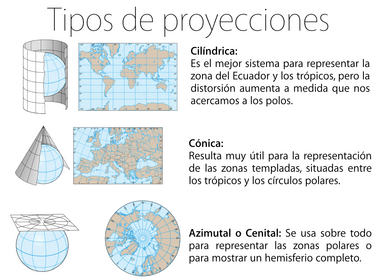

# Trabajando con datos
## Importamos librerías y datos

In [ ]:
import pandas as pd
import geopandas as gpd

In [ ]:
continentes = gpd.read_file("data/ne_110m_land.shp")
canevas = gpd.read_file("data/Canevas.shp")
indicatriz = gpd.read_file("data/Indicatriz.shp")

## Comprobamos su sistema de coordenadas

Un GeoDataFrame o GeoSeries tiene un atributo `.crs` (Coordinate Reference System) que contiene una descripción del sistema de referencia de coordenadas de las geometrías

In [ ]:
continentes.crs

## Visualización de datos

In [ ]:
ax = continentes.plot(edgecolor='#809848', facecolor='#d0ddb0', figsize=(15, 10))
canevas.plot(ax=ax, color='#828282')
indicatriz.plot(ax=ax, edgecolor='#c67edc', facecolor='#c897d7')

## Transformación de sistemas de coordenadas
Transformamos entre sistemas de coordenadas con el método `.to_crs` y nombrando el CRS de destino

In [ ]:
continentes = continentes.to_crs('ESRI:54030') # o (epsg=4326)

Y volvemos a plotear para controlar que existe correspondecia espacial

In [ ]:
ax = continentes.plot(edgecolor='#809848', facecolor='#d0ddb0', figsize=(15, 10))
canevas.plot(ax=ax, color='#828282')
indicatriz.plot(ax=ax, edgecolor='#c67edc', facecolor='#c897d7')

Desapareció nuestro canevas y nuestras indicatrices de Tissot. Será necesario transformar esos dataset para poder ser representados

In [ ]:
canevas = canevas.to_crs('ESRI:54030')
indicatriz = indicatriz.to_crs('ESRI:54030')

In [ ]:
ax = continentes.plot(edgecolor='#809848', facecolor='#d0ddb0', figsize=(15, 10))
canevas.plot(ax=ax, color='#828282')
indicatriz.plot(ax=ax, edgecolor='#c67edc', facecolor='#c897d7')

Pruebe a continuación otros sistemas de referencias o proyecciones cartográficas. Por ejemplo:
* EPSG:32662
* ESRI:54008
* ESRI:54029
* ESRI:54024
* ESRI:54021

In [ ]:
crs = 'EPSG:32662' # Remplace el valor aquí
canevas = canevas.to_crs(crs)
indicatriz = indicatriz.to_crs(crs)
continentes = continentes.to_crs(crs)
ax = continentes.plot(edgecolor='#809848', facecolor='#d0ddb0', figsize=(15, 10))
canevas.plot(ax=ax, color='#828282')
indicatriz.plot(ax=ax, edgecolor='#c67edc', facecolor='#c897d7')                                

## Asignación de un sistema de coordenadas
Retomamos el ejemplo de la clase anterior donde incorporamos un archivo CSV que carece de referencia de coordenadas

In [ ]:
df = pd.read_csv("data/establecimientos_educativos.csv")
escuelas = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitud'], df['latitud'])) # Quitamos a propósito crs="EPSG:4326"

In [ ]:
escuelas.plot(color='blue', markersize=1)

## Visualizamos nuestras escuelas

In [ ]:
ax = continentes.plot(edgecolor='#809848', facecolor='#d0ddb0', figsize=(15, 10))
canevas.plot(ax=ax, color='#828282')
indicatriz.plot(ax=ax, edgecolor='#c67edc', facecolor='#c897d7')
escuelas.plot(ax=ax,color='blue', markersize=1)

## Transformamos nuestras escuelas al CRS de la capa continente

In [ ]:
escuelas = escuelas.to_crs(continentes.crs)

ERROR! Requiere asignar un sistema de coordenadas antes de poder transformarlo

In [ ]:
# Seteamos CRS
escuelas = escuelas.set_crs('EPSG:4326')

# Luego transformamos
escuelas = escuelas.to_crs(continentes.crs)

In [ ]:
ax = continentes.plot(edgecolor='#809848', facecolor='#d0ddb0', figsize=(15, 10))
canevas.plot(ax=ax, color='#828282')
indicatriz.plot(ax=ax, edgecolor='#c67edc', facecolor='#c897d7')
escuelas.plot(ax=ax,color='blue', markersize=1)

In [ ]:
continentes.crs

In [ ]:
escuelas.crs